# DeAcero Practice Exercise

Import needed libraries

In [2]:
import requests
import json
import pandas as pd

## Get API information and store it as files

Declare API ULR and Keys as variables.

In [3]:
lp_2016= 'http://analytics.deacero.com/Api/GetApi/ApiPasajeros2016/' #Lista de Pasajeros 2016
lp_2017= 'http://analytics.deacero.com/Api/GetApi/ApiPasajeros2017/' #Lista Pasajeros 2017
lv_2016= 'http://analytics.deacero.com/Api/GetApi/ApiVuelos2016/' #Lista de Viajes 2016
lv_2017= 'http://analytics.deacero.com/Api/GetApi/ApiVuelos2017/' #Lista de Viajes 2017
la= 'http://analytics.deacero.com/Api/GetApi/ApiLineaAerea/' #Lista de Aerolineas

key1= 'ecfb5fc7-0932-590f-832c-6d6055f2be07'
key2= 'faabd632-cc39-552d-a68b-02de4242f636'
key3= '9ea3b836-6938-52dc-9626-a8e35db81dd5'
key4= 'fc126260-1cf8-5a46-995d-ba639ff5868b'
key5= '1a8d9e13-ce30-50fc-bf34-6490eb799a75'

Verify conection between notebook and API

Status codes are returned with every request that is made to a web server. Status codes indicate information about what happened with a request. Here are some codes that are relevant to GET requests:

* __200__: Everything went okay, and the result has been returned (if any).
* __301__: The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
* __400__: The server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
* __401__: The server thinks you’re not authenticated. Many APIs require login ccredentials, so this happens when you don’t send the right credentials to access an API.
* __403__: The resource you’re trying to access is forbidden: you don’t have the right permissions to see it.
* __404__: The resource you tried to access wasn’t found on the server.
* __503__: The server is not ready to handle the request.

In [4]:
response1 = requests.get(lp_2016+key1)
response2= requests.get(lp_2017+key2)
response3= requests.get(lv_2016+key3)
response4= requests.get(lv_2017+key4)
response5= requests.get(la+key5)

responses =[response1,response2,response3,response4,response5]

In [5]:
i=0
for response in responses:
    i+=1
    print('The response for API',i,'was',response)

The response for API 1 was <Response [200]>
The response for API 2 was <Response [200]>
The response for API 3 was <Response [200]>
The response for API 4 was <Response [200]>
The response for API 5 was <Response [200]>


As we can see, all the response were successful. Therefore we continue to extract the information.

In [6]:
data1 = response1.text
data2 = response2.text
data3 = response3.text
data4 = response4.text
data5 = response5.text

In [7]:
parsed_data1= json.loads(data1)
parsed_data2 =json.loads(data2)
parsed_data3 =json.loads(data3)
parsed_data4 =json.loads(data4)
parsed_data5 =json.loads(data5)

#parsed_dumped_data1 = json.dumps(parsed_data1, indent=4)
#print(parsed_data1)
#print(json.dumps(parsed_data1, indent=4))

Save all information into JSON files

In [8]:
with open('listaDePasajeros_2016.json', 'w') as json_file:
    json.dump(parsed_data1, json_file)

with open('listaDePasajeros_2017.json','w') as json_file:
    json.dump(parsed_data2,json_file)
    
with open('listaDeViajes_2016.json','w') as json_file:
    json.dump(parsed_data3,json_file)
    
with open('listaDeViajes_2017.json','w') as json_file:
    json.dump(parsed_data4,json_file)

with open('listaDeAerolineas.json','w') as json_file:
    json.dump(parsed_data5,json_file)

Read the files and read them and convert them into DataFrames

In [9]:
dfLP_2016 = pd.read_json('listaDePasajeros_2016.json')
dfLP_2017 = pd.read_json('listaDePasajeros_2017.json')
dfLV_2016 = pd.read_json('listaDeViajes_2016.json')
dfLV_2017 = pd.read_json('listaDeViajes_2017.json')
dfLA = pd.read_json('listaDeAerolineas.json')

## Cleaning and Normalization of data

Check head and info of each Dataframe.

In [10]:
dfLP_2016.head(5)

,ID_Pasajero,Pasajero,Edad
0,576,Danielle Thompson,60
1,579,Natalie Cuevas,49
2,683,John Murray,28
3,681,Michael Jacobs,24
4,592,Brian Hunt,40


In [11]:
dfLP_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_Pasajero  100 non-null    int64 
 1   Pasajero     100 non-null    object
 2   Edad         100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [12]:
dfLP_2017.head(5)

,ID_Pasajero,Pasajero,Edad
0,596,Javier Olson,71
1,625,Monique Ramirez,35
2,637,Rob Beeghly,29
3,730,Timothy Moore,21
4,682,Scot Wooten,72


In [13]:
dfLP_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_Pasajero  100 non-null    int64 
 1   Pasajero     100 non-null    object
 2   Edad         100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [14]:
dfLV_2016.head(5)

,Cve_LA,Viaje,Clase,Precio,Ruta,Cve_Cliente
0,SW,9/10/2016,Economy,60,DAL-MDW,553
1,AA,6/11/2016,Economy,150,DAL-SLC,554
2,DA,9/21/2016,Economy,68,DAL-AMA,554
3,UA,6/28/2016,Business,160,DAL-SLC,556
4,SW,6/25/2016,Economy,65,DAL-OKC,557


In [15]:
dfLV_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cve_LA       200 non-null    object
 1   Viaje        200 non-null    object
 2   Clase        200 non-null    object
 3   Precio       200 non-null    int64 
 4   Ruta         200 non-null    object
 5   Cve_Cliente  200 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.5+ KB


In [16]:
dfLV_2017.head(5)

,Cve_LA,Viaje,Clase,Precio,Ruta,Cve_Cliente
0,SW,1/4/2017,Economy,86,DAL-ATL,637
1,SW,1/4/2017,First Class,237,DAL-ATL,402
2,SW,1/2/2017,Economy,62,DAL-LGA,191
3,SW,1/2/2017,Economy,81,DAL-MDW,191
4,AA,1/4/2017,Business,169,DAL-LGA,637


In [17]:
dfLV_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cve_LA       200 non-null    object
 1   Viaje        200 non-null    object
 2   Clase        200 non-null    object
 3   Precio       200 non-null    int64 
 4   Ruta         200 non-null    object
 5   Cve_Cliente  200 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.5+ KB


In [18]:
dfLA.head(5)

,Code,Linea_Aerea
0,AA,American Airlines
1,SW,Southwest
2,AM,Aeromexico
3,AV,Avianca
4,KL,KLM


In [19]:
dfLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         5 non-null      object
 1   Linea_Aerea  5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


As we looked in all the dataframes info, all the dataframes doesn't have missing data. Therefore we don't need to drop any rows or columns.

Nevertheless, we need to confirm that the dataframes have unique values from each passanger.

In [20]:
dfLP_2016.groupby('ID_Pasajero').count()

,Pasajero,Edad
ID_Pasajero,,
553,1,1
554,1,1
556,1,1
557,1,1
559,1,1
...,...,...
690,1,1
692,1,1
694,1,1


In [21]:
dfLP_2017.groupby('ID_Pasajero').count()

,Pasajero,Edad
ID_Pasajero,,
38,10,10
191,2,2
402,1,1
550,2,2
560,2,2
562,2,2
566,1,1
570,5,5
582,6,6


Looking on the result in 'Lista de Pasajeros' from 2017, the data is duplicated. This extra values need to be deleted.

In [22]:
dfLP_2017.drop_duplicates(inplace=True)

We need to make sure that all the values are unique, so we run the _.groupby().count()_ to validate this. 

In [23]:
dfLP_2017.groupby('ID_Pasajero').count()

,Pasajero,Edad
ID_Pasajero,,
38,1,1
191,1,1
402,1,1
550,1,1
560,1,1
562,2,2
566,1,1
570,2,2
582,2,2


As we can see, there is still duplicated _'ID_Pasajero'_ this implies that there are repeated ID_Pasajero but with different values for _'Pasajero'_ and _'Edad'_ columns.

There are 3 options:

1. Add 1 to the _'ID_Pasajero'_ value.
2. Delete the second occurence of the _'ID_Pasajero'_ column.
3. Delete both occurence of the _'ID_Pasajero'_ column.

The firts and second option will have the consequence that the data stored in 'Lista de Vuelos' with the original value can be or not with the right passenger. Therefore have fault results.

The third option help us to not have incorrect nor correct information when we need to join _'Lista de Pasajeros'_ and _'Lista de Vuelos'_ tables. What we can do is for next steps and as an error handling is extract the information of the duplicated ID's and stored them for later resolution.

In this case, we will use the third option.

In [24]:
dfLP_2017.set_index('ID_Pasajero',inplace=True)

In [25]:
IDs = [562,570,582,717,742]

dfLP_2017.drop(IDs, inplace=True)
dfLP_2017

,Pasajero,Edad
ID_Pasajero,,
596,Javier Olson,71
625,Monique Ramirez,35
637,Rob Beeghly,29
730,Timothy Moore,21
682,Scot Wooten,72
701,Linda Walker,72
619,Timothy Adkins,66
714,Sheena Morgan,56
698,Bridget Lopez,27


In [26]:
dfLP_2017.reset_index(inplace=True)

In [27]:
dfLP_2017

,ID_Pasajero,Pasajero,Edad
0,596,Javier Olson,71
1,625,Monique Ramirez,35
2,637,Rob Beeghly,29
3,730,Timothy Moore,21
4,682,Scot Wooten,72
5,701,Linda Walker,72
6,619,Timothy Adkins,66
7,714,Sheena Morgan,56
8,698,Bridget Lopez,27
9,741,Jennifer Neal,31


Now that we have cleaned and normalized all the information of both dataframes, we can continue to transform them.

## Transformation of data

As we noted, the datframes for 'Lista de Pasajeros' 2016 and 2017 have the same amount of columns and the 'Lista de Vuelos' 2016 and 2017 as well. This lead us to create a union between their dataframes creating a single dataframe for same files. 

In [28]:
dfLP_total = pd.concat([dfLP_2016,dfLP_2017])

In [29]:
dfLP_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 27
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_Pasajero  128 non-null    int64 
 1   Pasajero     128 non-null    object
 2   Edad         128 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB


In [30]:
dfLV_total = pd.concat([dfLV_2016,dfLV_2017])

In [31]:
dfLV_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cve_LA       400 non-null    object
 1   Viaje        400 non-null    object
 2   Clase        400 non-null    object
 3   Precio       400 non-null    int64 
 4   Ruta         400 non-null    object
 5   Cve_Cliente  400 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 21.9+ KB


Now that we have all the information, we have to get order and make the indexing of the final dataframes. 

* Lista de Pasajeros: will be sorted and indexed by the 'ID_Pasajero'.
* Lista de Vuelos: will remain with it's current index.

In [32]:
dfLP_total.set_index(['ID_Pasajero'])

,Pasajero,Edad
ID_Pasajero,,
576,Danielle Thompson,60
579,Natalie Cuevas,49
683,John Murray,28
681,Michael Jacobs,24
592,Brian Hunt,40
...,...,...
191,Dan Reichenbach,55
729,Kendra Daniel,59
658,April Wiggins,21


Making the connection between both dataframes (_Lista de Pasajeros_ and _Lista de Vuelos_) we can infer that on the table _Lista de Vuelos_ the column named _'Cve_Cliente'_ are the values that we can search in the column _'ID_Pasajero'_ of the table _Lista de Pasajeros_. Therefore the next step is change the name of the column for futures operations.

In [33]:
dfLV_total.rename(columns={'Cve_Cliente':'ID_Pasajero'},inplace=True)

Now, we create a Join between both dataframes. We take the next image as reference for undertanding the nature of ‘left’, ‘right’, ‘outer' and ‘inner’ Join.

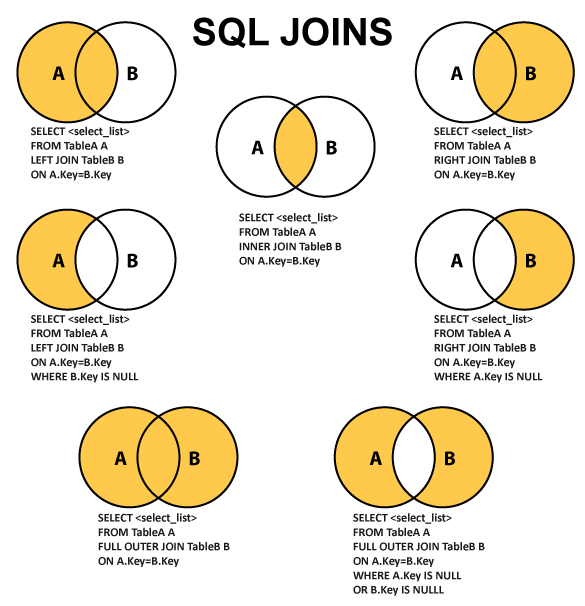

The next objective is to create a full dataframes containing the information of the passangers of each flight. So the join has to take place based on the 'Lista de Vuelos' table as our _Left Table_ and our _Right Table_ as 'Lista de Pasajeros' table.

The method we chose was _merge_, this will help us to join the dataframes by columns or indexes.

What will happen if we choose one of the joins is:
* __Left Join__: All the information of the _Left Table_ will be shown and __ONLY__ the information of the _Right Table_ that have a relation.
* __Right Join__: All the information of the _Right Table_ will be shown and __ONLY__ the information of the _Left Table_ that have a relation.
* __Outer Join__: All the information of the _Left Table_ and the _Right Table_.
* __Inner Join__: __ONLY__ the information that do have a relation between the _Left Table_ and the _Right Table_.

The direction we have is to have the all the information related to the flight with the passenger, therefore we select the inner join, this will give us only the existing information between flight and passenger alowing us later on to analyze the times a passanger have been traveling and when.

### Inner Join - Flights with Passengers

In [34]:
dfJoin = pd.merge(dfLV_total,dfLP_total,how='inner',on=['ID_Pasajero'])
dfJoin

,Cve_LA,Viaje,Clase,Precio,Ruta,ID_Pasajero,Pasajero,Edad
0,SW,9/10/2016,Economy,60,DAL-MDW,553,Nancy Lomonaco,34
1,SW,11/18/2016,Business,81,DAL-PHX,553,Nancy Lomonaco,34
2,AA,6/11/2016,Economy,150,DAL-SLC,554,Naresj Patel,25
3,DA,9/21/2016,Economy,68,DAL-AMA,554,Naresj Patel,25
4,AM,7/13/2016,First Class,233,DAL-HOU,554,Naresj Patel,25
...,...,...,...,...,...,...,...,...
361,AV,11/15/2017,Economy,150,DAL-OKC,619,Timothy Adkins,66
362,AV,9/1/2017,First Class,166,DAL-LGA,729,Kendra Daniel,59
363,AA,6/27/2017,Economy,119,DAL-AMA,729,Kendra Daniel,59
364,AM,5/24/2017,Business,194,DAL-AMA,625,Monique Ramirez,35


As we can see, we have less information, initially we had 400 records of flights on _'Lista de Vuelos'_ table. This observation is interpreted as the missing information of passengers in _Lista de Pasajeros_ table. This either is because the records of passengers we dropped or lost records.

The second direction we have is to join the information of the last join with the _Lista de Aerolineas_ table. In this part they ask us to find the airline information and in case that it doesn't exist, add the label _'Otra'_.

For this we need to use the __Left__ join, and configure the NaN results with the label _'Otra'_. Taking as our _Left Table_ the __dfJoin__ table and the __'Lista de Aerolineas'__ table as our _Right Table_.

First we need to change the column _'Code'_ of the table __'Lista de Aerolineas'__ for the merge.

In [35]:
dfLA.rename(columns={'Code':'Cve_LA'},inplace=True)

In [55]:
df_final = pd.merge(dfJoin,dfLA,how='left',on=['Cve_LA'])
df_final

,Cve_LA,Viaje,Clase,Precio,Ruta,ID_Pasajero,Pasajero,Edad,Linea_Aerea
0,SW,9/10/2016,Economy,60,DAL-MDW,553,Nancy Lomonaco,34,Southwest
1,SW,11/18/2016,Business,81,DAL-PHX,553,Nancy Lomonaco,34,Southwest
2,AA,6/11/2016,Economy,150,DAL-SLC,554,Naresj Patel,25,American Airlines
3,DA,9/21/2016,Economy,68,DAL-AMA,554,Naresj Patel,25,NaN
4,AM,7/13/2016,First Class,233,DAL-HOU,554,Naresj Patel,25,Aeromexico
...,...,...,...,...,...,...,...,...,...
361,AV,11/15/2017,Economy,150,DAL-OKC,619,Timothy Adkins,66,Avianca
362,AV,9/1/2017,First Class,166,DAL-LGA,729,Kendra Daniel,59,Avianca
363,AA,6/27/2017,Economy,119,DAL-AMA,729,Kendra Daniel,59,American Airlines
364,AM,5/24/2017,Business,194,DAL-AMA,625,Monique Ramirez,35,Aeromexico


We need to know if there's information missing on the column _Linea_Aerea_ to change it to 'Other'.

In [37]:
df_final[df_final['Linea_Aerea'].isna()]

,Cve_LA,Viaje,Clase,Precio,Ruta,ID_Pasajero,Pasajero,Edad,Linea_Aerea
3,DA,9/21/2016,Economy,68,DAL-AMA,554,Naresj Patel,25,NaN
6,UA,6/28/2016,Business,160,DAL-SLC,556,Nat Gilpin,55,NaN
15,DA,12/2/2016,Economy,122,DAL-AUS,557,Natalie DeCherney,63,NaN
16,DA,6/25/2016,Business,146,DAL-LGA,557,Natalie DeCherney,63,NaN
17,UA,12/2/2016,Economy,152,DAL-PHX,557,Natalie DeCherney,63,NaN
28,UA,11/22/2016,Economy,92,DAL-AMA,563,Neil Ducich,32,NaN
31,UA,11/28/2016,Economy,61,DAL-AMA,565,Neil Knudson,37,NaN
32,DA,5/9/2016,First Class,265,DAL-ATL,568,Nick Crebassa,21,NaN
33,DA,5/9/2016,Economy,60,DAL-AUS,568,Nick Crebassa,21,NaN
225,UA,1/1/2017,Economy,78,DAL-HOU,682,Scot Wooten,72,NaN


As we can see, we do have information with NaN, therefore we change them into _'Otra'_.

In [38]:
df_final['Linea_Aerea'] = df_final['Linea_Aerea'].fillna('Otra')
df_final.head(5)

,Cve_LA,Viaje,Clase,Precio,Ruta,ID_Pasajero,Pasajero,Edad,Linea_Aerea
0,SW,9/10/2016,Economy,60,DAL-MDW,553,Nancy Lomonaco,34,Southwest
1,SW,11/18/2016,Business,81,DAL-PHX,553,Nancy Lomonaco,34,Southwest
2,AA,6/11/2016,Economy,150,DAL-SLC,554,Naresj Patel,25,American Airlines
3,DA,9/21/2016,Economy,68,DAL-AMA,554,Naresj Patel,25,Otra
4,AM,7/13/2016,First Class,233,DAL-HOU,554,Naresj Patel,25,Aeromexico


On row 3 we can see that the NaN value has changed into _'Otra'_ value.
If we want to check again the NaN values we can do so.

In [39]:
df_final[df_final['Linea_Aerea'].isna()]

,Cve_LA,Viaje,Clase,Precio,Ruta,ID_Pasajero,Pasajero,Edad,Linea_Aerea


At last, we need to gert rid of some columns. 

In [40]:
df_final.drop(columns=['Cve_LA','ID_Pasajero','Pasajero',],inplace=True)
df_final.head(5)

,Viaje,Clase,Precio,Ruta,Edad,Linea_Aerea
0,9/10/2016,Economy,60,DAL-MDW,34,Southwest
1,11/18/2016,Business,81,DAL-PHX,34,Southwest
2,6/11/2016,Economy,150,DAL-SLC,25,American Airlines
3,9/21/2016,Economy,68,DAL-AMA,25,Otra
4,7/13/2016,First Class,233,DAL-HOU,25,Aeromexico


## Data Report

Now that we have all the data stored inside a single dataframe, we can begin to create the report of the information. In this case we need to show the semestral mean of flights, class, route and airline.

In [41]:
df_final

,Viaje,Clase,Precio,Ruta,Edad,Linea_Aerea
0,9/10/2016,Economy,60,DAL-MDW,34,Southwest
1,11/18/2016,Business,81,DAL-PHX,34,Southwest
2,6/11/2016,Economy,150,DAL-SLC,25,American Airlines
3,9/21/2016,Economy,68,DAL-AMA,25,Otra
4,7/13/2016,First Class,233,DAL-HOU,25,Aeromexico
...,...,...,...,...,...,...
361,11/15/2017,Economy,150,DAL-OKC,66,Avianca
362,9/1/2017,First Class,166,DAL-LGA,59,Avianca
363,6/27/2017,Economy,119,DAL-AMA,59,American Airlines
364,5/24/2017,Business,194,DAL-AMA,35,Aeromexico


To have the month and year of the _'Viaje'_ column, we create two extra columns to extract this information. 
This will help us later to filter and get the desired dataframes for the report.

In [42]:
df_final['Month'] = pd.DatetimeIndex(df_final['Viaje']).month
df_final['Year'] = pd.DatetimeIndex(df_final['Viaje']).year

In [43]:
df_final.head(5)

,Viaje,Clase,Precio,Ruta,Edad,Linea_Aerea,Month,Year
0,9/10/2016,Economy,60,DAL-MDW,34,Southwest,9,2016
1,11/18/2016,Business,81,DAL-PHX,34,Southwest,11,2016
2,6/11/2016,Economy,150,DAL-SLC,25,American Airlines,6,2016
3,9/21/2016,Economy,68,DAL-AMA,25,Otra,9,2016
4,7/13/2016,First Class,233,DAL-HOU,25,Aeromexico,7,2016


Now that we have the two columns, we make 4 masks, this mask creates a Series of boolean values. The values will have a corresponfing index of the original dataframe and then we can extract the information that applies to that mask.

In [44]:
mask_2016s1 = ((df_final['Year'] == 2016 ) & (df_final['Month'] <= 6))
mask_2016s2 = ((df_final['Year'] == 2016 ) & (df_final['Month'] >= 7) & (df_final['Month'] <= 12))
mask_2017s1 = (df_final['Year'] == 2017 ) & (df_final['Month'] <= 6)
mask_2017s2 = (df_final['Year'] == 2017 ) & (df_final['Month'] >= 7) & (df_final['Month'] <= 12)                                          

In [56]:
mask_2016s1

0      False
1      False
2       True
3      False
4      False
       ...  
361    False
362    False
363    False
364    False
365    False
Length: 366, dtype: bool

In [45]:
df_s12016 = df_final.loc[mask_2016s1]
df_s22016 = df_final.loc[mask_2016s2]
df_s12017 = df_final.loc[mask_2017s1]
df_s22017 = df_final.loc[mask_2017s2]

In [46]:
df_s12016

,Viaje,Clase,Precio,Ruta,Edad,Linea_Aerea,Month,Year
2,6/11/2016,Economy,150,DAL-SLC,25,American Airlines,6,2016
5,3/12/2016,Economy,68,DAL-GRR,25,American Airlines,3,2016
6,6/28/2016,Business,160,DAL-SLC,55,Otra,6,2016
7,1/20/2016,Economy,118,DAL-PHX,55,Aeromexico,1,2016
8,3/5/2016,Economy,261,DAL-PHX,55,American Airlines,3,2016
...,...,...,...,...,...,...,...,...
190,3/26/2016,Business,269,DAL-GRR,46,Aeromexico,3,2016
192,4/24/2016,First Class,70,DAL-SLC,52,Southwest,4,2016
195,2/11/2016,Economy,253,DAL-GRR,35,Aeromexico,2,2016
196,1/11/2016,First Class,88,DAL-OKC,69,KLM,1,2016


In [47]:
df_s22016

,Viaje,Clase,Precio,Ruta,Edad,Linea_Aerea,Month,Year
0,9/10/2016,Economy,60,DAL-MDW,34,Southwest,9,2016
1,11/18/2016,Business,81,DAL-PHX,34,Southwest,11,2016
3,9/21/2016,Economy,68,DAL-AMA,25,Otra,9,2016
4,7/13/2016,First Class,233,DAL-HOU,25,Aeromexico,7,2016
10,12/2/2016,Economy,126,DAL-MDW,63,Southwest,12,2016
...,...,...,...,...,...,...,...,...
191,9/19/2016,First Class,252,DAL-AUS,66,Avianca,9,2016
193,11/25/2016,Business,176,DAL-ELP,25,Aeromexico,11,2016
194,11/18/2016,Business,74,DAL-MDW,39,American Airlines,11,2016
197,9/14/2016,First Class,187,DAL-SLC,69,Aeromexico,9,2016


In [48]:
df_s12017

,Viaje,Clase,Precio,Ruta,Edad,Linea_Aerea,Month,Year
200,1/4/2017,Economy,86,DAL-ATL,29,Southwest,1,2017
201,1/4/2017,Business,169,DAL-LGA,29,American Airlines,1,2017
202,6/5/2017,First Class,234,DAL-GRR,29,KLM,6,2017
203,6/18/2017,Business,198,DAL-AUS,29,American Airlines,6,2017
204,6/10/2017,First Class,228,DAL-TUL,29,KLM,6,2017
...,...,...,...,...,...,...,...,...
354,5/10/2017,Business,158,DAL-GRR,62,Aeromexico,5,2017
358,1/27/2017,Business,162,DAL-ATL,27,Southwest,1,2017
359,6/19/2017,Business,89,DAL-MDW,27,Avianca,6,2017
363,6/27/2017,Economy,119,DAL-AMA,59,American Airlines,6,2017


In [49]:
df_s22017

,Viaje,Clase,Precio,Ruta,Edad,Linea_Aerea,Month,Year
205,8/3/2017,First Class,104,DAL-SLC,29,Southwest,8,2017
206,7/10/2017,Economy,250,DAL-PHX,29,KLM,7,2017
209,11/6/2017,Business,88,DAL-LGA,29,KLM,11,2017
213,11/17/2017,Business,259,DAL-SLC,33,Aeromexico,11,2017
214,8/29/2017,Business,229,DAL-SLC,33,Southwest,8,2017
...,...,...,...,...,...,...,...,...
357,8/8/2017,Economy,110,DAL-GRR,54,Avianca,8,2017
360,9/7/2017,First Class,163,DAL-SLC,66,Avianca,9,2017
361,11/15/2017,Economy,150,DAL-OKC,66,Avianca,11,2017
362,9/1/2017,First Class,166,DAL-LGA,59,Avianca,9,2017


Now that we have all the desired data frames, now we can create the final report. We need the mean of the semestral price by year.

### Report of Mean price by Class, Route and Airline - Semester 1 2016

In [50]:
df_prices116 = df_s12016.drop(['Viaje','Edad','Month','Year'],axis=1)
df_prices116.groupby(by=['Clase','Ruta','Linea_Aerea']).mean()

Precio
Clase       Ruta    Linea_Aerea              
Business    DAL-AMA American Airlines    58.0
                    Avianca             132.0
                    KLM                 184.0
            DAL-ATL Aeromexico          218.0
                    American Airlines   102.0
...                                       ...
First Class DAL-SLC KLM                 214.0
                    Southwest            70.0
            DAL-TUL Aeromexico          104.0
                    KLM                 204.0
                    Southwest           103.0

[97 rows x 1 columns]

### Report of Mean price by Class, Route and Airline - Semester 2 2016

In [51]:
df_prices216 = df_s22016.drop(['Viaje','Edad','Month','Year'],axis=1)
df_prices216.groupby(by=['Clase','Ruta','Linea_Aerea']).mean()

Precio
Clase       Ruta    Linea_Aerea              
Business    DAL-AMA American Airlines   186.0
            DAL-ATL American Airlines   135.0
                    Avianca             107.0
                    KLM                 227.0
                    Southwest           185.0
...                                       ...
First Class DAL-SLC Aeromexico          185.0
                    American Airlines   239.0
            DAL-TUL Aeromexico          214.0
                    Avianca             245.0
                    KLM                 186.0

[76 rows x 1 columns]

### Report of Mean price by Class, Route and Airline - Semester 1 2017

In [52]:
df_prices117 = df_s12017.drop(['Viaje','Edad','Month','Year'],axis=1)
df_prices117.groupby(by=['Clase','Ruta','Linea_Aerea']).mean()

Precio
Clase       Ruta    Linea_Aerea                  
Business    DAL-AMA Aeromexico         194.000000
                    Southwest          163.000000
            DAL-ATL KLM                167.000000
                    Southwest          131.500000
            DAL-AUS American Airlines  110.666667
...                                           ...
First Class DAL-PHX Southwest          169.000000
            DAL-SLC Avianca            137.000000
            DAL-TUL Aeromexico          55.000000
                    Avianca             78.000000
                    KLM                242.500000

[71 rows x 1 columns]

### Report of Mean price by Class, Route and Airline - Semester 2 2017

In [53]:
df_prices217 = df_s22017.drop(['Viaje','Edad','Month','Year'],axis=1)
df_prices217.groupby(by=['Clase','Ruta','Linea_Aerea']).mean()

Precio
Clase       Ruta    Linea_Aerea                  
Business    DAL-AMA Aeromexico         204.000000
                    KLM                121.000000
            DAL-ATL Aeromexico         201.000000
            DAL-AUS KLM                164.500000
            DAL-ELP Aeromexico          62.000000
            DAL-GRR Southwest          220.000000
            DAL-HOU American Airlines  232.000000
                    Southwest          169.000000
            DAL-LGA American Airlines  112.000000
                    Avianca            233.000000
                    KLM                127.000000
                    Southwest          142.000000
            DAL-MDW Aeromexico         206.000000
                    Southwest          125.000000
            DAL-PHX American Airlines  240.000000
                    Southwest          120.000000
            DAL-SLC Aeromexico         195.500000
                    American Airlines  190.000000
                    KLM                242.000000
                    Southwest          229.000000
            DAL-TUL Aeromexico         145.500000
Economy     DAL-AMA Aeromexico          56.000000
            DAL-ATL KLM                 55.000000
            DAL-AUS Aeromexico         217.000000
                    American Airlines  248.000000
                    Southwest          167.000000
            DAL-ELP KLM                167.000000
            DAL-GRR Avianca            118.000000
            DAL-MDW KLM                120.000000
            DAL-OKC Aeromexico         182.500000
                    Avianca            192.500000
            DAL-PHX Aeromexico         208.000000
                    American Airlines  125.000000
                    KLM                250.000000
            DAL-SLC KLM                219.000000
            DAL-TUL Aeromexico         129.000000
                    Avianca            111.500000
                    Southwest          163.000000
First Class DAL-AMA KLM                213.500000
            DAL-ATL Aeromexico          81.000000
                    KLM                214.000000
                    Southwest          204.000000
            DAL-AUS Aeromexico         250.000000
                    Avianca             79.000000
            DAL-HOU Southwest           62.000000
            DAL-LGA American Airlines  242.000000
                    Avianca            166.000000
                    KLM                163.000000
                    Southwest           71.500000
            DAL-MDW Aeromexico          72.000000
                    KLM                167.000000
            DAL-OKC American Airlines  260.000000
                    Avianca            101.000000
                    Southwest          143.333333
            DAL-PHX Avianca            247.000000
            DAL-SLC Avianca            163.000000
                    Southwest          170.500000
            DAL-TUL Aeromexico         208.500000